<a href="https://colab.research.google.com/github/Bogdanf21/NLP2025FII/blob/main/TopicModelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install wikipedia-api

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia-api: filename=Wikipedia_API-0.8.1-py3-none-any.whl size=15383 sha256=2966337de1a853ad959746e87df7d379a19661b6d4c3749d6b932273a61c79b8
  Stored in directory: /root/.cache/pip/wheels/33/3c/79/b36253689d838af4a0539782853ac3cc38a83a6591ad570dde
Successfully built wikipedia-api


In [ ]:
# 1. Download the 15 Wikipedia documents using wikipedia API.
import wikipediaapi
import random

# Initialize Wikipedia API
wiki = wikipediaapi.Wikipedia(
    user_agent='TopicModellingHomework',
    language='en'
)

# --- Define 3 broad topics and 5 subtopics each ---
topics = {
    "Technology": [
        "Artificial intelligence",
        "Quantum computing",
        "Blockchain",
        "Cybersecurity",
        "Machine learning"
    ],
    "Sports": [
        "Football",
        "Tennis",
        "Basketball",
        "Olympic Games",
        "Marathon"
    ],
    "History": [
        "Roman Empire",
        "Industrial Revolution",
        "Ancient Egypt",
        "World War II",
        "French Revolution"
    ]
}

docs = []
labels = []

# --- Fetch 5 articles per topic ---
for category, titles in topics.items():
    print(f"\nDownloading {category} articles...")
    for title in titles:
        page = wiki.page(title)
        if page.exists():
            print(f"✔️  {title}")
            # Use only the first 3000 characters to avoid overly long texts
            docs.append(page.text[:3000])
            labels.append(category)
        else:
            print(f"⚠️  Page not found: {title}")

print(f"\nDownloaded {len(docs)} documents across {len(topics)} topics.")


✔️  Artificial intelligence
✔️  Quantum computing
✔️  Blockchain
✔️  Cybersecurity
✔️  Machine learning

✔️  Football
✔️  Tennis
✔️  Basketball
✔️  Olympic Games
✔️  Marathon

✔️  Roman Empire
✔️  Industrial Revolution
✔️  Ancient Egypt
✔️  World War II
✔️  French Revolution

Downloaded 15 documents across 3 topics.


In [ ]:
# 2. Lemmatization.
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string

# Download resources (only once)
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("omw-1.4")
nltk.download("stopwords")
nltk.download("punkt_tab") # Added to fix the LookupError

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

lemmatized_docs = []
for text in docs:
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]  # remove punctuation + stopwords
    lemmas = [lemmatizer.lemmatize(t) for t in tokens]
    lemmatized_docs.append(lemmas)

print(docs[0][:100])
print(lemmatized_docs[0][:100])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Artificial intelligence (AI) is the capability of computational systems to perform tasks typically a
['artificial', 'intelligence', 'ai', 'capability', 'computational', 'system', 'perform', 'task', 'typically', 'associated', 'human', 'intelligence', 'learning', 'reasoning', 'perception', 'field', 'research', 'computer', 'science', 'develops', 'study', 'method', 'software', 'enable', 'machine', 'perceive', 'environment', 'use', 'learning', 'intelligence', 'take', 'action', 'maximize', 'chance', 'achieving', 'defined', 'goal', 'application', 'ai', 'include', 'advanced', 'web', 'search', 'engine', 'google', 'search', 'recommendation', 'system', 'used', 'youtube', 'amazon', 'netflix', 'virtual', 'assistant', 'google', 'assistant', 'siri', 'alexa', 'autonomous', 'vehicle', 'waymo', 'generative', 'creative', 'tool', 'language', 'model', 'ai', 'art', 'superhuman', 'play', 'analysis', 'strategy', 'game', 'chess', 'go', 'however', 'many', 'ai', 'application', 'perceived', 'ai', 'lot', 'cutting'

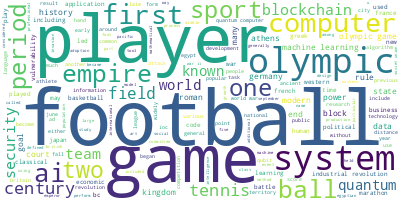

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud

flat_list = [word for sublist in lemmatized_docs for word in sublist]
long_string = ' '.join(flat_list)

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Join tokens back into space-separated strings (CountVectorizer expects text)
joined_docs = [' '.join(tokens) for tokens in lemmatized_docs]

# Initialize and fit the Bag-of-Words model
bow_vectorizer = CountVectorizer(max_features=2000)  # limit vocabulary size if needed
X_bow = bow_vectorizer.fit_transform(joined_docs)

# Inspect results
print("Shape of BOW matrix:", X_bow.shape)  # (num_documents, num_unique_words)
print("Example feature names:", bow_vectorizer.get_feature_names_out()[:20])

# Optional: Convert to DataFrame for readability
import pandas as pd
bow_df = pd.DataFrame(X_bow.toarray(), columns=bow_vectorizer.get_feature_names_out())
print(bow_df.head())

Shape of BOW matrix: (15, 1870)
Example feature names: ['ability' 'able' 'abolition' 'abuse' 'academi' 'academic' 'accelerate'
 'accelerated' 'accept' 'acceptance' 'accession' 'accompanied' 'according'
 'accordingly' 'account' 'accuracy' 'achieved' 'achievement' 'achieving'
 'across']
   ability  able  abolition  abuse  academi  academic  accelerate  \
0        1     0          0      0        0         1           1   
1        0     0          0      0        1         0           0   
2        0     0          0      0        0         0           0   
3        0     0          0      0        0         0           0   
4        0     0          0      0        0         0           0   

   accelerated  accept  acceptance  ...  writing  wrote  xvi  yd  year  yet  \
0            1       0           0  ...        0      0    0   0     0    0   
1            0       0           0  ...        0      0    0   0     1    1   
2            0       1           0  ...        0      0    0  

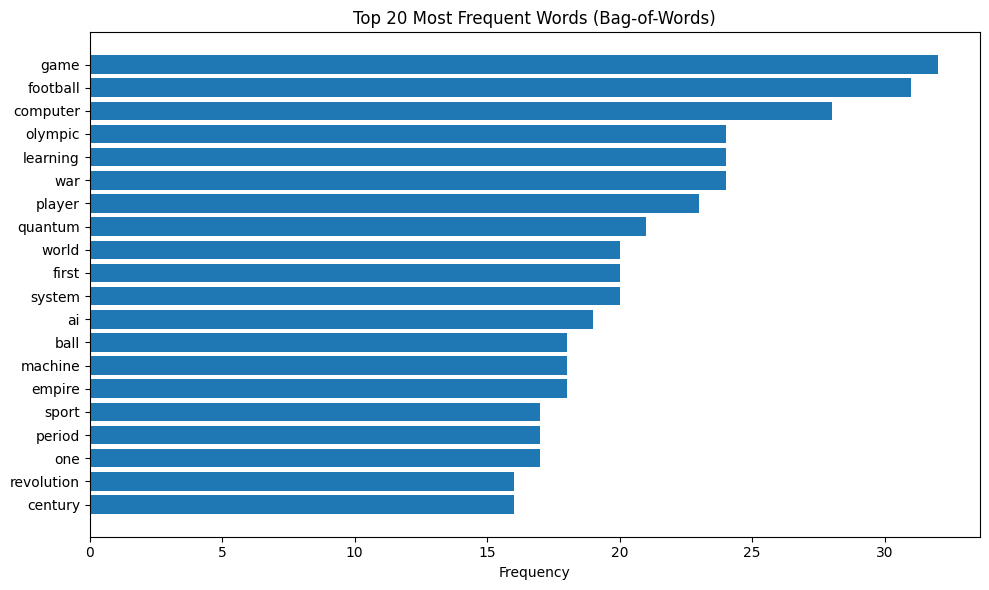

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- Compute word frequencies ---
word_freq = np.asarray(X_bow.sum(axis=0)).flatten()
vocab = bow_vectorizer.get_feature_names_out()

# Combine into a DataFrame for sorting
freq_df = pd.DataFrame({'word': vocab, 'count': word_freq})
freq_df = freq_df.sort_values(by='count', ascending=False).head(20)  # top 20 words

# --- Plot ---
plt.figure(figsize=(10, 6))
plt.barh(freq_df['word'][::-1], freq_df['count'][::-1])  # reverse for top-down
plt.xlabel("Frequency")
plt.title("Top 20 Most Frequent Words (Bag-of-Words)")
plt.tight_layout()
plt.show()

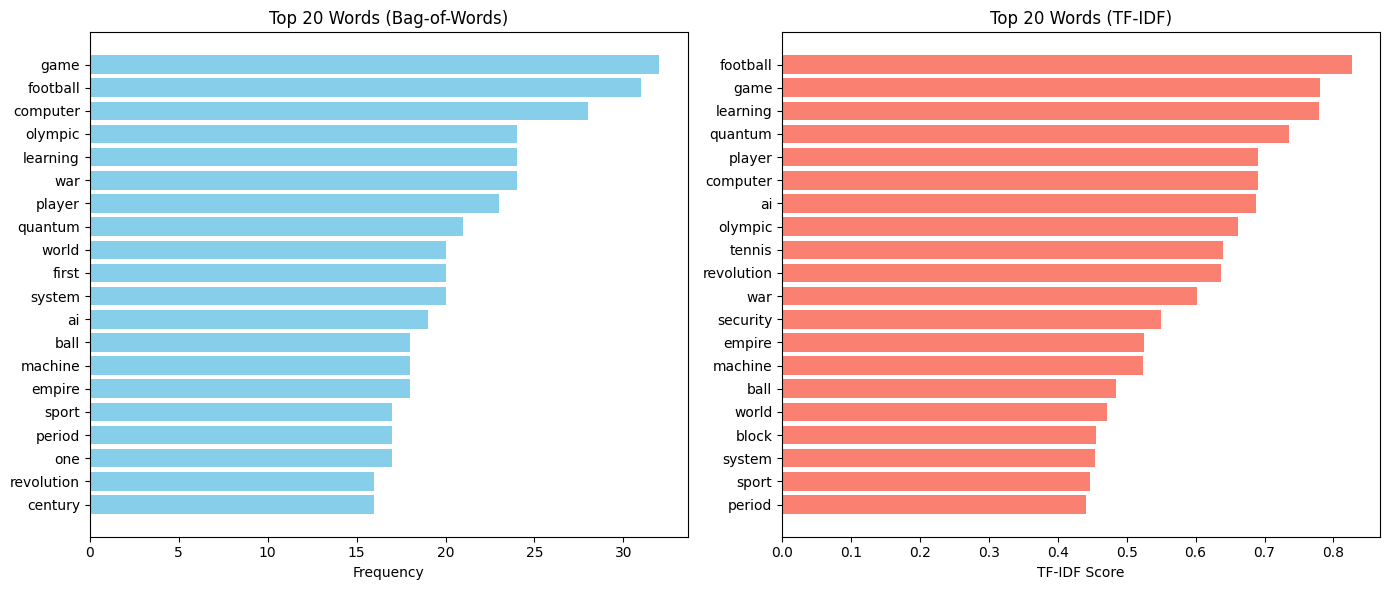

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Prepare text input for vectorizers ---
joined_docs = [' '.join(tokens) for tokens in lemmatized_docs]

# --- 1️⃣ Bag-of-Words Vectorization ---
bow_vectorizer = CountVectorizer(max_features=2000)
X_bow = bow_vectorizer.fit_transform(joined_docs)

bow_vocab = bow_vectorizer.get_feature_names_out()
bow_freq = np.asarray(X_bow.sum(axis=0)).flatten()

bow_df = pd.DataFrame({'word': bow_vocab, 'count': bow_freq})
bow_df = bow_df.sort_values(by='count', ascending=False).head(20)

# --- 2️⃣ TF-IDF Vectorization ---
tfidf_vectorizer = TfidfVectorizer(max_features=2000)
X_tfidf = tfidf_vectorizer.fit_transform(joined_docs)

tfidf_vocab = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = np.asarray(X_tfidf.sum(axis=0)).flatten()

tfidf_df = pd.DataFrame({'word': tfidf_vocab, 'score': tfidf_scores})
tfidf_df = tfidf_df.sort_values(by='score', ascending=False).head(20)

# --- 3️⃣ Plotting ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bag of Words plot
axes[0].barh(bow_df['word'][::-1], bow_df['count'][::-1], color='skyblue')
axes[0].set_title("Top 20 Words (Bag-of-Words)")
axes[0].set_xlabel("Frequency")

# TF-IDF plot
axes[1].barh(tfidf_df['word'][::-1], tfidf_df['score'][::-1], color='salmon')
axes[1].set_title("Top 20 Words (TF-IDF)")
axes[1].set_xlabel("TF-IDF Score")

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 3️⃣ Latent Semantic Analysis (LSA) using SVD ---
n_components = 100  # number of latent dimensions (can increase to 100+ for large corpora)

# LSA on Bag-of-Words
lsa_bow = TruncatedSVD(n_components=n_components, random_state=42)
X_bow_lsa = lsa_bow.fit_transform(X_bow)

# LSA on TF-IDF
lsa_tfidf = TruncatedSVD(n_components=n_components, random_state=42)
X_tfidf_lsa = lsa_tfidf.fit_transform(X_tfidf)

print("Explained variance ratio (BoW):", lsa_bow.explained_variance_ratio_.sum())
print("Explained variance ratio (TF-IDF):", lsa_tfidf.explained_variance_ratio_.sum())

# --- 5️⃣ Top Terms per Latent Concept ---
def top_terms_per_concept(svd_model, vectorizer, n_terms=10):
    terms = vectorizer.get_feature_names_out()
    for i, comp in enumerate(svd_model.components_):
        terms_in_comp = zip(terms, comp)
        sorted_terms = sorted(terms_in_comp, key=lambda x: x[1], reverse=True)[:n_terms]
        print(f"\nConcept {i + 1}:")
        for term, weight in sorted_terms:
            print(f"{term:15} {weight:.4f}")

print("\n=== Top Terms for BoW-LSA ===")
top_terms_per_concept(lsa_bow, bow_vectorizer)

print("\n=== Top Terms for TF-IDF-LSA ===")
top_terms_per_concept(lsa_tfidf, tfidf_vectorizer)

Explained variance ratio (BoW): 1.0
Explained variance ratio (TF-IDF): 0.9999999999999992

=== Top Terms for BoW-LSA ===

Concept 1:
football        0.5447
game            0.2829
ball            0.2158
player          0.2139
olympic         0.1862
sport           0.1641
team            0.1588
code            0.1406
rule            0.1306
goal            0.1252

Concept 2:
learning        0.3953
computer        0.3107
machine         0.2847
quantum         0.2515
ai              0.1878
field           0.1283
system          0.1157
data            0.1149
human           0.1118
algorithm       0.1063

Concept 3:
olympic         0.4347
game            0.3829
war             0.1776
ioc             0.1455
olympics        0.1455
world           0.1437
tennis          0.1076
athlete         0.1076
sport           0.0906
germany         0.0753

Concept 4:
war             0.3480
germany         0.2031
quantum         0.1959
empire          0.1853
japan           0.1625
soviet          0.1422
uni

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, NMF
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Latent Semantic Analysis (LSA) using Truncated SVD ---
n_components = 10  # number of latent dimensions

# --- Non-negative Matrix Factorization (NMF) ---
nmf_bow = NMF(n_components=n_components, init='nndsvda', random_state=42, max_iter=400)
X_bow_nmf = nmf_bow.fit_transform(X_bow)

nmf_tfidf = NMF(n_components=n_components, init='nndsvda', random_state=42, max_iter=400)
X_tfidf_nmf = nmf_tfidf.fit_transform(X_tfidf)

# Reconstruction error (the lower, the better)
print("\nReconstruction error (BoW-NMF):", nmf_bow.reconstruction_err_)
print("Reconstruction error (TF-IDF-NMF):", nmf_tfidf.reconstruction_err_)


# --- Helper: Show top terms per latent concept ---
def top_terms_per_concept(model, vectorizer, n_terms=10, model_name="Model"):
    terms = vectorizer.get_feature_names_out()
    for i, comp in enumerate(model.components_[:5]):  # show only first 5 components
        terms_in_comp = zip(terms, comp)
        sorted_terms = sorted(terms_in_comp, key=lambda x: x[1], reverse=True)[:n_terms]
        print(f"\n{model_name} Concept {i + 1}:")
        for term, weight in sorted_terms:
            print(f"{term:15} {weight:.4f}")


print("\n=== Top Terms for BoW-NMF ===")
top_terms_per_concept(nmf_bow, bow_vectorizer, model_name="NMF (BoW)")

print("\n=== Top Terms for TF-IDF-NMF ===")
top_terms_per_concept(nmf_tfidf, tfidf_vectorizer, model_name="NMF (TF-IDF)")


Reconstruction error (BoW-NMF): 50.35685309066548
Reconstruction error (TF-IDF-NMF): 2.040425929790689

=== Top Terms for BoW-NMF ===

NMF (BoW) Concept 1:
football        6.9143
ball            2.0387
code            1.7843
player          1.4044
team            1.3896
goal            1.3512
rule            1.3330
common          1.1152
sport           0.8934
rugby           0.8922

NMF (BoW) Concept 2:
learning        7.1121
machine         5.3344
computer        1.7793
field           1.7782
human           1.7781
algorithm       1.7776
data            1.7766
mathematical    1.4224
study           1.4224
book            1.0669

NMF (BoW) Concept 3:
olympic         8.1549
game            7.7143
ioc             2.8431
olympics        2.8431
athlete         2.0624
world           2.0423
sport           2.0232
year            1.2556
committee       1.2323
century         1.2228

NMF (BoW) Concept 4:
war             6.1865
germany         3.8502
japan           3.0802
world           2.

In [ ]:
pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 36.5 MB/s eta 0:00:00


[['artificial', 'intelligence', 'ai', 'capability', 'computational', 'system', 'perform', 'task', 'typically', 'associated', 'human', 'intelligence', 'learning', 'reasoning', 'perception', 'field', 'research', 'computer', 'science', 'develops', 'study', 'method', 'software', 'enable', 'machine', 'perceive', 'environment', 'use', 'learning', 'intelligence', 'take', 'action', 'maximize', 'chance', 'achieving', 'defined', 'goal', 'application', 'ai', 'include', 'advanced', 'web', 'search', 'engine', 'google', 'search', 'recommendation', 'system', 'used', 'youtube', 'amazon', 'netflix', 'virtual', 'assistant', 'google', 'assistant', 'siri', 'alexa', 'autonomous', 'vehicle', 'waymo', 'generative', 'creative', 'tool', 'language', 'model', 'ai', 'art', 'superhuman', 'play', 'analysis', 'strategy', 'game', 'chess', 'go', 'however', 'many', 'ai', 'application', 'perceived', 'ai', 'lot', 'cutting', 'edge', 'ai', 'filtered', 'general', 'application', 'often', 'without', 'called', 'ai', 'something

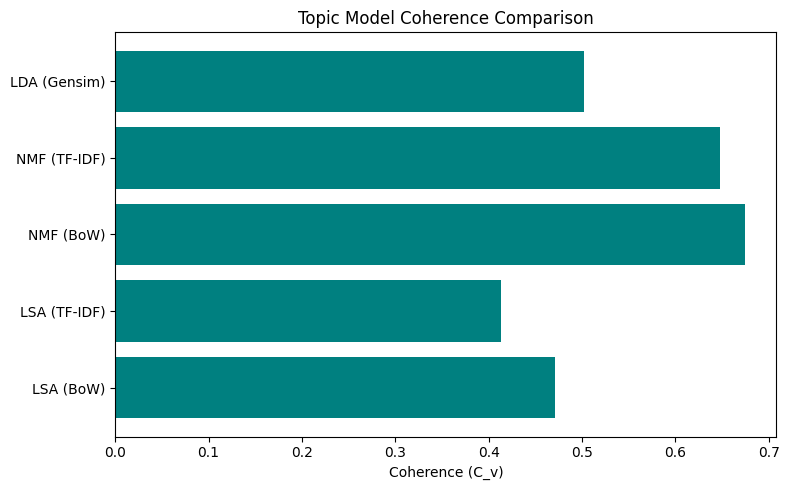

In [ ]:
# ============================================
# Latent Semantic Analysis (LSA), NMF, and Gensim LDA
# with Coherence Evaluation
# ============================================

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, NMF
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim import corpora
import numpy as np
import matplotlib.pyplot as plt

# --- Assume you already have preprocessed lemmatized_docs ---
joined_docs = [' '.join(tokens) for tokens in lemmatized_docs]

# --- Vectorization ---
bow_vectorizer = CountVectorizer(max_features=2000)
tfidf_vectorizer = TfidfVectorizer(max_features=2000)

X_bow = bow_vectorizer.fit_transform(joined_docs)
X_tfidf = tfidf_vectorizer.fit_transform(joined_docs)

# --- Parameters ---
n_components = 10  # number of topics

# =========================
# 1️⃣ Latent Semantic Analysis (LSA)
# =========================
lsa_bow = TruncatedSVD(n_components=n_components, random_state=42)
X_bow_lsa = lsa_bow.fit_transform(X_bow)

lsa_tfidf = TruncatedSVD(n_components=n_components, random_state=42)
X_tfidf_lsa = lsa_tfidf.fit_transform(X_tfidf)

# =========================
# 2️⃣ Non-negative Matrix Factorization (NMF)
# =========================
nmf_bow = NMF(n_components=n_components, init='nndsvda', random_state=42, max_iter=400)
X_bow_nmf = nmf_bow.fit_transform(X_bow)

nmf_tfidf = NMF(n_components=n_components, init='nndsvda', random_state=42, max_iter=400)
X_tfidf_nmf = nmf_tfidf.fit_transform(X_tfidf)

# =========================
# 3️⃣ Gensim Latent Dirichlet Allocation (LDA)
# =========================
tokenized_docs = [doc.split() for doc in joined_docs]
print(tokenized_docs)
id2word = corpora.Dictionary(tokenized_docs)
corpus = [id2word.doc2bow(text) for text in tokenized_docs]
print(corpus)
lda_gensim = LdaModel(
    corpus=corpus,
    id2word=id2word,
    num_topics=n_components,
    random_state=42,
    passes=10,
    alpha='auto',
    per_word_topics=True
)
print(lda_gensim.print_topics())
# =========================
# 4️⃣ Helper: Extract top terms per concept/topic
# =========================
def get_top_words(model_components, feature_names, n_top=10):
    topics = []
    for comp in model_components:
        top_terms = [feature_names[i] for i in comp.argsort()[:-n_top - 1:-1]]
        topics.append(top_terms)
    return topics

# Get top terms
lsa_bow_topics = get_top_words(lsa_bow.components_, bow_vectorizer.get_feature_names_out())
lsa_tfidf_topics = get_top_words(lsa_tfidf.components_, tfidf_vectorizer.get_feature_names_out())
nmf_bow_topics = get_top_words(nmf_bow.components_, bow_vectorizer.get_feature_names_out())
nmf_tfidf_topics = get_top_words(nmf_tfidf.components_, tfidf_vectorizer.get_feature_names_out())
lda_gensim_topics = [[word for word, _ in lda_gensim.show_topic(i, topn=10)] for i in range(n_components)]

# =========================
# 5️⃣ Compute Coherence Scores
# =========================
def compute_coherence(topics, texts, dictionary):
    cm = CoherenceModel(topics=topics, texts=texts, dictionary=dictionary, coherence='c_v')
    return cm.get_coherence()

coherences = {
    'LSA (BoW)': compute_coherence(lsa_bow_topics, tokenized_docs, id2word),
    'LSA (TF-IDF)': compute_coherence(lsa_tfidf_topics, tokenized_docs, id2word),
    'NMF (BoW)': compute_coherence(nmf_bow_topics, tokenized_docs, id2word),
    'NMF (TF-IDF)': compute_coherence(nmf_tfidf_topics, tokenized_docs, id2word),
    'LDA (Gensim)': compute_coherence(lda_gensim_topics, tokenized_docs, id2word)
}

# =========================
# 6️⃣ Display Results
# =========================
print("\n=== Coherence Scores (c_v) ===")
for model_name, score in coherences.items():
    print(f"{model_name:15}: {score:.4f}")

# --- Optional: visualize ---
plt.figure(figsize=(8, 5))
plt.barh(list(coherences.keys()), list(coherences.values()), color='teal')
plt.xlabel("Coherence (C_v)")
plt.title("Topic Model Coherence Comparison")
plt.tight_layout()
plt.show()

In [ ]:
pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 63.4 MB/s eta 0:00:00


In [16]:
import pyLDAvis.gensim
import pickle
import pyLDAvis
import os

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(10))
print(LDAvis_data_filepath)

# Create the directory if it doesn't exist
results_dir = './results'
if not os.path.exists(results_dir):
    os.makedirs(results_dir)


# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_gensim, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(10) +'.html')

LDAvis_prepared

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

./results/ldavis_prepared_10


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.122783 -0.116569       1        1  20.830335
2     -0.144903  0.035571       2        1  19.607019
3     -0.001247 -0.182477       3        1  13.572971
6      0.147608  0.080352       4        1  13.223541
9     -0.119576 -0.010258       5        1   6.965345
4     -0.086184  0.000759       6        1   6.690812
8      0.051012  0.085901       7        1   6.516101
0      0.001474  0.053378       8        1   6.416823
7      0.032557  0.053908       9        1   6.167219
5     -0.003524 -0.000565      10        1   0.009835, topic_info=            Term       Freq      Total Category  logprob  loglift
799     football  25.000000  25.000000  Default  30.0000  30.0000
98      learning  15.000000  15.000000  Default  29.0000  29.0000
311      quantum  16.000000  16.000000  Default  28.0000  28.0000
105      machine  12.000000  12.000000  Default  27.0000  27.0000
956      olympic  18.000000  18.000000  Default  26.0000  26.0000
...          ...        ...        ...      ...      ...      ...
867         team   0.000284  11.505597  Topic10  -7.2368  -1.3839
1015  basketball   0.000274   7.270549  Topic10  -7.2698  -0.9578
171       system   0.000277  14.672313  Topic10  -7.2585  -1.6487
923       france   0.000272   7.215029  Topic10  -7.2774  -0.9577
1229         war   0.000273  17.621140  Topic10  -7.2737  -1.8470

[566 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
878       1  0.713057  accordingly
1126      2  0.223237           ad
1126      4  0.223237           ad
1126      7  0.446474           ad
1126      8  0.223237           ad
...     ...       ...          ...
1873      9  0.864274          xvi
356       2  0.175873         year
356       3  0.175873         year
356       4  0.527620         year
356       9  0.175873         year

[805 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 4, 7, 10, 5, 9, 1, 8, 6])

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag